In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
negative = pd.read_csv('negative_data.csv')
positive = pd.read_csv('positive_data.csv')
neutral = pd.read_csv('neural_data.csv')
rate0 = pd.read_csv('rate0_data.csv')
def change(x):
    if "-" in x:
        return "-1"
    else:
        return x

rate0.loc[:, "Label"] = rate0["Label"].apply(lambda x: change(x)) 
rate0["Label"] = rate0["Label"].astype('str').astype('int')



In [3]:
neutral.fillna(0, inplace=True)


In [4]:
neutral["Label"] = neutral["Label"].astype('int')
neutral


,Rate,Review,Label
0,5.0,Vào khu này là xác định lăn về r đồ ăn phong ...,0
1,4.8,Đồ ăn đa cả rẻ hợp phải tự phục ngồi thì nta ...,0
2,5.0,Quầy sushi trứ danh ở Aeon các nhiều loại đa ...,-1
3,5.0,Hơi,0
4,5.0,Ngon nhưng đông và,0
5,5.0,HN lại đón gió mùa sau mấy ngày nắng ấm mà cá...,0
6,5.0,Nếu ở đây chỉ uống mỗi cafe trứng và nhau hướ...,0
7,5.0,Cafe trứng nóng,0
8,4.8,Quán bé tẹo mà quá đông thành ra chật ko chịu...,-1
9,4.2,Cafe rất giá cả Không gian quán nhỏ bàn với m...,-1


In [5]:
def label(df):
    for i in range(np.shape(df)[0]):
        if df.iloc[i,2] is 1:
            df.iloc[i,2] = 'Positive'
        else :
            df.iloc[i,2] = 'Negative'
    return df
            
negative = label(negative)
positive = label(positive)
neutral = label(neutral)
rate0 = label(rate0)
df = pd.concat([negative,positive,neutral,rate0])
df.reset_index(drop=True)

df.head(10)

,Rate,Review,Label
0,4,Mình thề là mình ko thể cảm nổi đồ ăn ở aeon ...,Negative
1,3.8,Đôi khi thèm lên là bất chấp nắng nóng phi Và...,Negative
2,3.8,Ngõ treo biển cafe trứng đúng kiểu phố cổ hà ...,Negative
3,3.8,Mình thấy địa chỉ cafe Giảng ở Nguyễn Hữu Huâ...,Negative
4,2.2,Mình là người Hà Nội và cũng cực kỳ khó tính ...,Negative
5,3.4,Mình là một người khá khó tính trong chuyện ă...,Negative
6,3.8,Giá phù hợp sinh viên học cơ mà lần đầu tiên ...,Negative
7,1,Mình đặt hàng cốc từ quán xác nhận đơn hàng m...,Negative
8,1,Mếu tìm tkấy,Negative
9,4,Hôm nay đi dạo qua nổi hứng muốn thử kem ốc q...,Negative


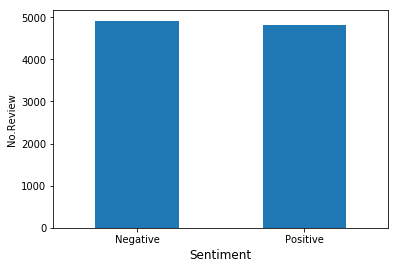

In [6]:
# Data distribution
distribution = df.groupby('Label').Review.count()
ax = distribution.plot.bar(rot=0, fontsize=10)
ax.set_xlabel('Sentiment',fontsize=12)
ax.set_ylabel('No.Review',fontsize=10)
plt.show()

In [7]:
fname = "vn_stopwords"
with open(fname) as f:
    content = f.readlines()
# Remove `\n` at the end of each line
vn_stopwords = [x.strip() for x in content]

In [8]:
import re
from underthesea import word_tokenize

def remove_stopword(review):
    filtered = ' '.join([word for word in review.split() if word not in vn_stopwords])
    return filtered

correct_mapping = {
    "ship": "vận chuyển",
    "shop": "cửa hàng",
    "m": "mình",
    "mik": "mình",
    "ko": "không",
    "k": " không ",
    "kh": "không",
    "khong": "không",
    "kg": "không",
    "khg": "không",
    "tl": "trả lời",
    "r": "rồi",
    "fb": "mạng xã hội", # facebook
    "face": "mạng xã hội",
    "thanks": "cảm ơn",
    "thank": "cảm ơn",
    "tks": "cảm ơn",
    "tk": "cảm ơn",
    "ok": "tốt",
    "dc": "được",
    "vs": "với",
    "đt": "điện thoại",
    "thjk": "thích",
    "qá": "quá",
    "trể": "trễ",
    "bgjo": "bao giờ",
    "good": "tốt", #continue:
    "bh": "bây giờ",
    "sale": "giảm giá",
    "ntn": "như thế này",
    "vote": "đánh giá tốt",
    "ms": "mới",
    "hnay": "hôm nay",
    "kute": "dễ thương",
    "bik": "biết",
    "od": "gọi món",
    "mn": "mọi người",
    "c": "chị",
    "đc": "được",
    "uk": "ừ",
    "t": "tôi",
    "tt": "thứ tự",
    "gj": "gì",
    "j": "gì",
    "đx": "được",
    "m": "mày",
    "zậy": "vậy",
    "wa": "qua",
    "zui": "vui",
    "thik": "thích",
    "add": "thêm",
    "pko": "phải không",
    "cmt": "bình luận",
    "dt": "dễ thương",
    "ib": "inbox",
    "klq": "không liên quan",
    "nx": "nhận xét",
    "rep": "trả lời",
    "dj": "đi",
    "mog": "mong",
    "bít": "biết",
    "nc": "nước",
    "lun": "luôn",
    "hiu": "hiểu",
    "rui": "rồi",
    "thui": "thôi",
    "view": "phong cảnh",
    "đg": "đang",
    "h": "giờ",
    "zòn": "giòn",
    "cx": "cũng",
    "kbiet": "không biết",
    "đ": "đéo",
    "mk": "mình",
    "trc": "trước",
    "bùn": "buồn",
    "iu": "yêu",
    "vs": "với",
    "lua": "lừa",
    "b": "bạn"
}

def check_acronyms(w):
    if w in correct_mapping:
        return correct_mapping[w]
    else:
        return w

def mapping(review):
    word = review.split()
    word = map(check_acronyms,word)
    word = ' '.join(word)
    return word

# Preprocess Data
column_name = 'Review'
df.loc[:, column_name] = df[column_name].apply(lambda x: str.lower(x))  # Converting to lower case
df.loc[:, column_name] = df[column_name].apply(lambda x: x.strip())  # Remove \n
df.loc[:, column_name] = df[column_name].apply(lambda x: re.sub('\d', '', x))  # Remove number
df.loc[:, column_name] = df[column_name].apply(lambda x: re.sub('\W+', ' ', x))  # Remove special characters
df.loc[:, column_name] = df[column_name].apply(lambda x: remove_stopword(x))  # Remove stopwords
df.loc[:, column_name] = df[column_name].apply(lambda x: mapping(x))  # Map acronyms


# Word tokenize
df.loc[:, column_name] = df[column_name].apply(lambda x: word_tokenize(x,format="text"))
df['sentiment_id'] = df['Label'].factorize()[0]

In [9]:
df.head(10)

,Rate,Review,Label,sentiment_id
0,4,mình thề mình không_thể cảm nổi đồ ăn ở aeon m...,Negative,0
1,3.8,đôi thèm bất_chấp nắng nóng phi bao_giờ sang đ...,Negative,0
2,3.8,ngõ treo biển cafe trứng đúng kiểu phố cổ hà_n...,Negative,0
3,3.8,mình thấy địa cafe giảng ở nguyễn_hữu_huân ngo...,Negative,0
4,2.2,mình người hà nội cực_kỳ khó_tính trong ăn nhà...,Negative,0
5,3.4,mình một người khá khó_tính trong ăn mọi người...,Negative,0
6,3.8,giá phù_hợp sinh_viên học_cơ lần đầu_tiên đến ...,Negative,0
7,1,mình đặt_hàng cốc quán xác_nhận đơn hàng đến g...,Negative,0
8,1,mếu tìm tkấy,Negative,0
9,4,hôm_nay đi dạo nổi hứng muốn thử kem ốc quế na...,Negative,0


In [10]:
# Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
# ML Model
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils.multiclass import unique_labels
import seaborn as sns
svm = SVC()

reviews = df.Review
labels = df.sentiment_id
tfidf = TfidfVectorizer(min_df=0.1, max_df=0.9, ngram_range=(1,1))
features = pd.DataFrame(tfidf.fit_transform(reviews).toarray())
features.columns = tfidf.get_feature_names()
features

,bánh,bạn,chỗ,còn,gian,giá,gọi,hay,hơi,hơn,...,thấy,trong,uống,về,vị,ăn,đi,được,đến,đồ
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.541715,0.259848,0.000000,0.261072,0.271464
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.334467,...,0.273705,0.000000,0.000000,0.000000,0.000000,0.184367,0.000000,0.355781,0.000000,0.554341
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.293072,0.393009,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.502356,0.000000,0.000000,0.000000,0.207995,0.176755,0.000000,...,0.325537,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.163101,0.180132,0.357182,0.000000,0.093490,0.134535,0.000000,0.135169,0.000000
5,0.000000,0.000000,0.000000,0.115885,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.132372,0.146195,0.144944,0.000000,0.075876,0.109188,0.000000,0.109703,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.257520,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.164284,0.236410,0.000000,0.237524,0.493957
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.354211,0.000000,0.000000,0.000000,...,0.340896,0.400601,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.331996,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.734307,0.100724,0.144945,0.194372,0.000000,0.000000


/home/quylg/Python/Python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/quylg/Python/Python/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/quylg/Python/Python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


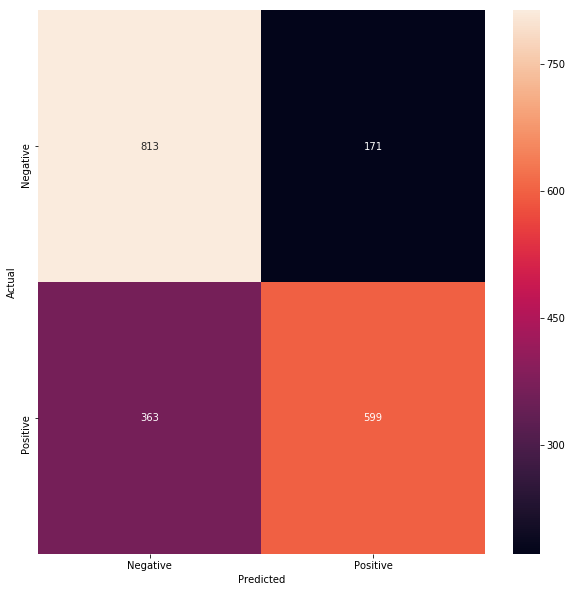

              precision    recall  f1-score   support

    Negative       0.69      0.83      0.75       984
    Positive       0.78      0.62      0.69       962

   micro avg       0.73      0.73      0.73      1946
   macro avg       0.73      0.72      0.72      1946
weighted avg       0.73      0.73      0.72      1946



/home/quylg/Python/Python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/quylg/Python/Python/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/quylg/Python/Python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


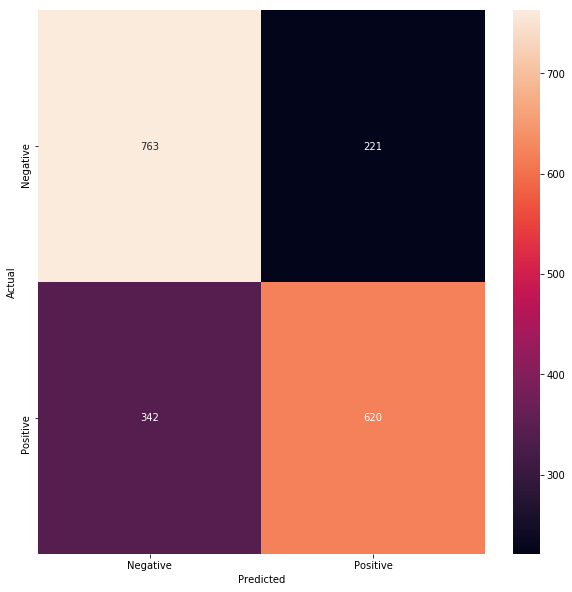

              precision    recall  f1-score   support

    Negative       0.69      0.78      0.73       984
    Positive       0.74      0.64      0.69       962

   micro avg       0.71      0.71      0.71      1946
   macro avg       0.71      0.71      0.71      1946
weighted avg       0.71      0.71      0.71      1946



/home/quylg/Python/Python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/quylg/Python/Python/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/quylg/Python/Python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


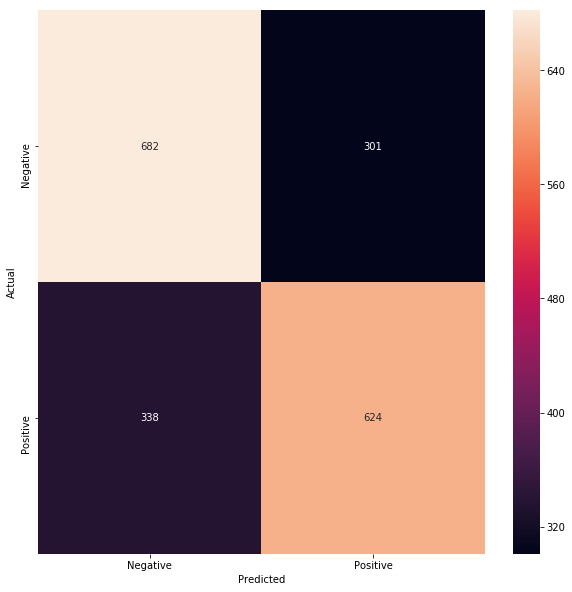

              precision    recall  f1-score   support

    Negative       0.67      0.69      0.68       983
    Positive       0.67      0.65      0.66       962

   micro avg       0.67      0.67      0.67      1945
   macro avg       0.67      0.67      0.67      1945
weighted avg       0.67      0.67      0.67      1945



/home/quylg/Python/Python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/quylg/Python/Python/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/quylg/Python/Python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


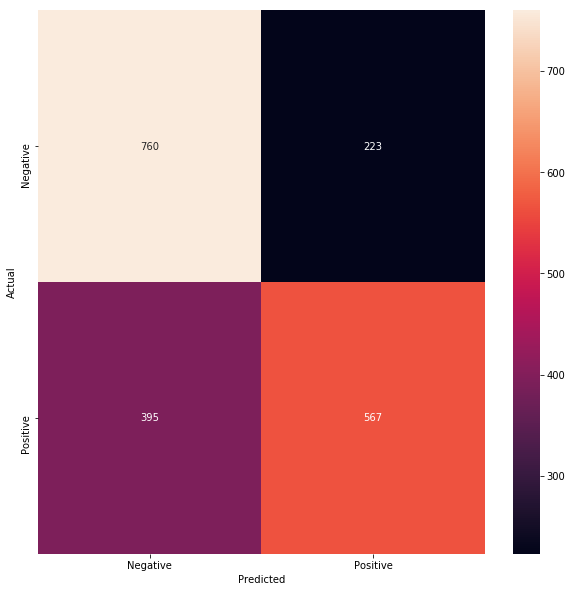

              precision    recall  f1-score   support

    Negative       0.66      0.77      0.71       983
    Positive       0.72      0.59      0.65       962

   micro avg       0.68      0.68      0.68      1945
   macro avg       0.69      0.68      0.68      1945
weighted avg       0.69      0.68      0.68      1945



/home/quylg/Python/Python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/quylg/Python/Python/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/quylg/Python/Python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


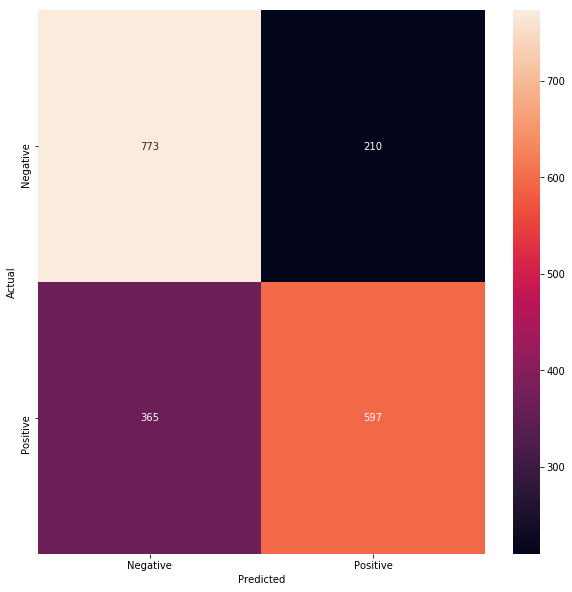

              precision    recall  f1-score   support

    Negative       0.68      0.79      0.73       983
    Positive       0.74      0.62      0.67       962

   micro avg       0.70      0.70      0.70      1945
   macro avg       0.71      0.70      0.70      1945
weighted avg       0.71      0.70      0.70      1945

0.7208191277332088


In [15]:
# Divide dataset
from sklearn.model_selection import cross_val_score, StratifiedKFold
# from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, f1_score, confusion_matrix

kf = StratifiedKFold(n_splits=5,random_state=0)
f1_scores = []
np.set_printoptions(precision=2)


for train_index, test_index in kf.split(features, labels):
    clf1 = LogisticRegression()
    clf2 = RandomForestClassifier()
    clf3 = SVC()
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = labels.iloc[train_index], labels.iloc[test_index]
    eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('svc', clf3)], voting='hard')
    eclf.fit(X_train,y_train)
    y_pred = eclf.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred, pos_label=0))
    conf_mat1 = confusion_matrix(y_test,y_pred)
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(conf_mat1, annot=True, fmt='d',
                xticklabels=df.Label.unique(), yticklabels=df.Label.unique())
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    print(classification_report(y_test, y_pred, target_names=['Negative','Positive']))

print(np.mean(f1_scores))
    

In [14]:
np.mean(f1_scores)

0.7231718974131732